In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [419]:
df=pd.read_csv("laptop_data.csv")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


## Preprocessing

In [420]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [421]:
# dropping unnamed column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [422]:
# checking null values
df.isna().sum()/len(df)*100

Company             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price               0.0
dtype: float64

There are no null values in data

In [423]:
cat_cols=df.select_dtypes(include="O").columns
cat_cols

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [424]:
# checking garbage values
for i in cat_cols:
    print(i,df[i].unique())
    print("-------------------------------------------------------------------")

Company ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
-------------------------------------------------------------------
TypeName ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
-------------------------------------------------------------------
ScreenResolution ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultr

In [425]:
# fetching resolution values from ScreenResolution variable and creating new column as x_resolution and y_resolution.
new=df['ScreenResolution'].str.split("x",expand=True)

In [426]:
df['x_resolution']=new[0]
df['y_resolution']=new[1]

In [427]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_resolution,y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,IPS Panel Retina Display 2560,1600


In [428]:
df['x_resolution'].unique()

array(['IPS Panel Retina Display 2560', '1440', 'Full HD 1920',
       'IPS Panel Retina Display 2880', '1366', 'IPS Panel Full HD 1920',
       'IPS Panel Retina Display 2304',
       'IPS Panel Full HD / Touchscreen 1920',
       'Full HD / Touchscreen 1920', 'Touchscreen / Quad HD+ 3200',
       'IPS Panel Touchscreen 1920', 'Touchscreen 2256',
       'Quad HD+ / Touchscreen 3200', 'IPS Panel 1366',
       'IPS Panel 4K Ultra HD / Touchscreen 3840',
       'IPS Panel Full HD 2160', '4K Ultra HD / Touchscreen 3840',
       'Touchscreen 2560', '1600', 'IPS Panel 4K Ultra HD 3840',
       '4K Ultra HD 3840', 'Touchscreen 1366', 'IPS Panel Full HD 1366',
       'IPS Panel 2560', 'IPS Panel Full HD 2560',
       'IPS Panel Retina Display 2736', 'Touchscreen 2400', '2560',
       'IPS Panel Quad HD+ 2560', 'IPS Panel Quad HD+ 3200',
       'IPS Panel Quad HD+ / Touchscreen 3200',
       'IPS Panel Touchscreen 1366', '1920',
       'IPS Panel Touchscreen / 4K Ultra HD 3840',
       'IPS Pa

In [429]:
df['x_resolution']=df['x_resolution'].str[-4:]

In [430]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_resolution,y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600


In [431]:
# changing datatype of x_resolution and y_resolution
df['x_resolution']=df['x_resolution'].astype("int")
df['y_resolution']=df['y_resolution'].astype("int")

In [432]:
# dropping ScreenResolution column
df.drop("ScreenResolution",axis=1,inplace=True)

In [433]:
df[['x_resolution','y_resolution']].dtypes

x_resolution    int32
y_resolution    int32
dtype: object

In [434]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [435]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [436]:
# Removing str 'GB' from ram variable 
df['Ram']=df['Ram'].str.replace("GB","")

In [437]:
df['Ram']=df['Ram'].astype("int")

In [438]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [439]:
# creating new columns for storage and saperating it according to its measure
df['HDD Storage']=df['Memory'].apply(lambda x: x if "HDD" in x and "+" not in x else 0).str.replace("HDD","").str.replace("TB","000").str.replace("GB","")
df['SSD Storage']=df['Memory'].apply(lambda x: x if "SSD" in x and "+" not in x else 0).str.replace("SSD","").str.replace("TB","000").str.replace("GB","")
df['Flash Storage']=df['Memory'].apply(lambda x: x if "Flash Storage" in x and "+" not in x else 0).str.replace("Flash Storage","").str.replace("TB","000").str.replace("GB","")
df['Hybrid Storage']=df['Memory'].apply(lambda x: x if "Hybrid" in x else 0).str.replace("Hybrid","").str.replace("TB","000").str.replace("GB","")

In [440]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_resolution,y_resolution,HDD Storage,SSD Storage,Flash Storage,Hybrid Storage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,NaN,128,NaN,NaN
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,NaN,NaN,128,NaN
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,NaN,256,NaN,NaN
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,NaN,512,NaN,NaN
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,NaN,256,NaN,NaN


In [441]:
df['Hybrid Storage'].unique()

array([nan, '1.0000 ', '508 ', '512 SSD +  1.0000 ', '256 SSD +  1.0000 '],
      dtype=object)

In [442]:
# Saperating Hybrid Storage
df['Hybrid SSD']=df['Hybrid Storage'].str.split("+",expand=True)[0].str.replace("SSD","")
df['Hybrid HDD']=df['Hybrid Storage'].str.split("+",expand=True)[1]

In [443]:
df['HDD Storage']=df['HDD Storage'].str.replace(".0000","000")
df['SSD Storage']=df['SSD Storage'].str.replace(".0000","000")
df['Hybrid SSD']=df['Hybrid SSD'].str.replace(".0000","000")
df['Hybrid HDD']=df['Hybrid HDD'].str.replace(".0000","000")

In [444]:
df[['HDD Storage','SSD Storage','Flash Storage','Hybrid Storage','Hybrid SSD','Hybrid HDD']]=df[['HDD Storage','SSD Storage','Flash Storage','Hybrid Storage','Hybrid SSD','Hybrid HDD']].fillna(0)

In [445]:
# dropping Memory and Hybrid Storage Column
df.drop(['Memory','Hybrid Storage'],inplace=True,axis=1)

In [446]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,x_resolution,y_resolution,HDD Storage,SSD Storage,Flash Storage,Hybrid SSD,Hybrid HDD
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,0,128,0,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0,0,128,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,0,256,0,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,0,512,0,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,0,256,0,0,0


In [447]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [448]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [449]:
# Removing kg string from Weight
df['Weight']=df['Weight'].str.replace('kg',"").astype("float")

In [450]:
df.dtypes

Company           object
TypeName          object
Inches           float64
Cpu               object
Ram                int32
Gpu               object
OpSys             object
Weight           float64
Price            float64
x_resolution       int32
y_resolution       int32
HDD Storage       object
SSD Storage       object
Flash Storage     object
Hybrid SSD        object
Hybrid HDD        object
dtype: object

In [451]:
df['HDD Storage']=df['HDD Storage'].astype("int")
df['SSD Storage']=df['SSD Storage'].astype("int")
df['Flash Storage']=df['Flash Storage'].astype("int")
df['Hybrid SSD']=df['Hybrid SSD'].astype("int")
df['Hybrid HDD']=df['Hybrid HDD'].astype("int")

In [452]:
df.dtypes

Company           object
TypeName          object
Inches           float64
Cpu               object
Ram                int32
Gpu               object
OpSys             object
Weight           float64
Price            float64
x_resolution       int32
y_resolution       int32
HDD Storage        int32
SSD Storage        int32
Flash Storage      int32
Hybrid SSD         int32
Hybrid HDD         int32
dtype: object

In [453]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,x_resolution,y_resolution,HDD Storage,SSD Storage,Flash Storage,Hybrid SSD,Hybrid HDD
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,0,128,0,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,0,0,128,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,0,256,0,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,0,512,0,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,0,256,0,0,0


## Visualization

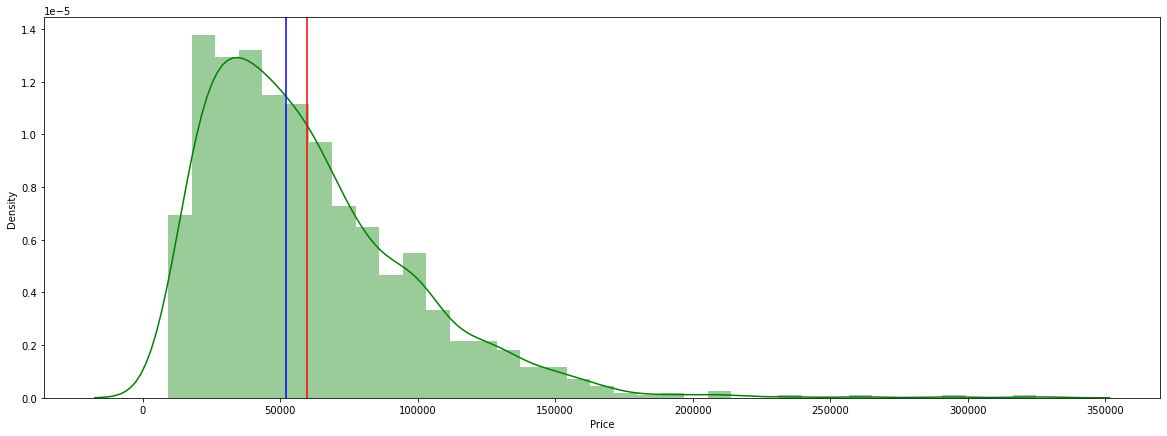

In [454]:
plt.figure(figsize=(20,7))
sns.distplot(df['Price'],color="green")
plt.axvline(df['Price'].mean(),color="red")
plt.axvline(df['Price'].median(),color="blue")
plt.show()

### Insights:
    We can see that mean is greater than median it means Price variable is right skewed.
    The tail is in in Right Side and it is not normally distributted.

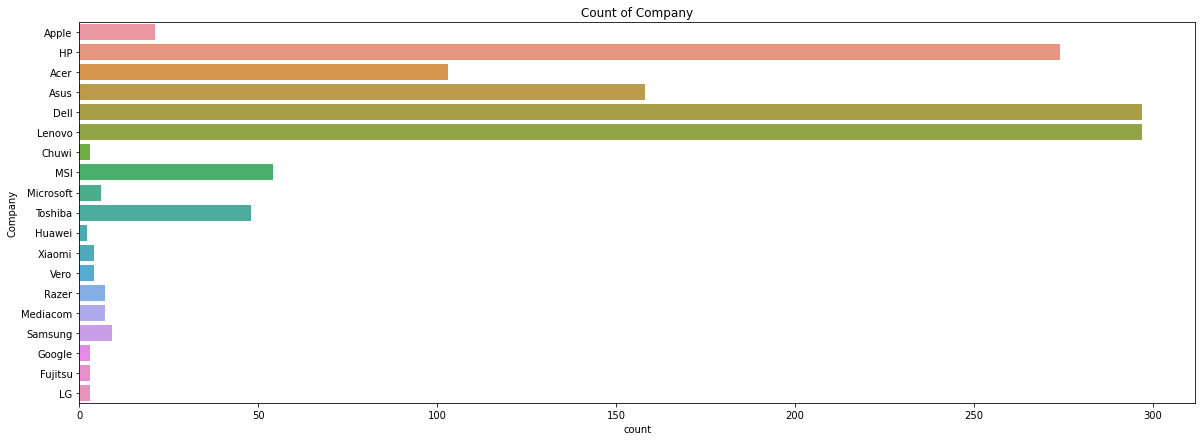

In [455]:
plt.figure(figsize=(20,7))
sns.countplot(y=df['Company'])
plt.title("Count of Company")
plt.show()

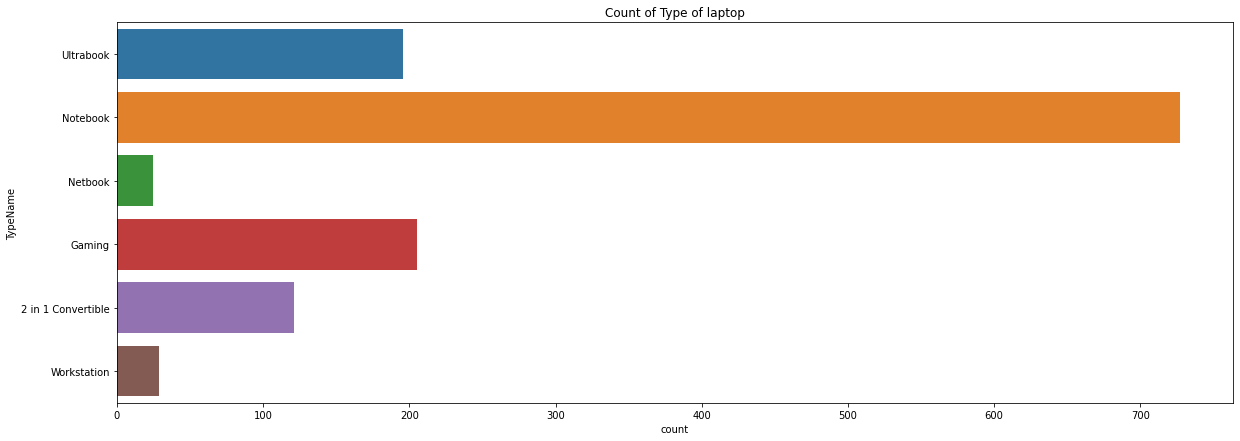

In [456]:
plt.figure(figsize=(20,7))
sns.countplot(y=df['TypeName'])
plt.title("Count of Type of laptop")
plt.show()

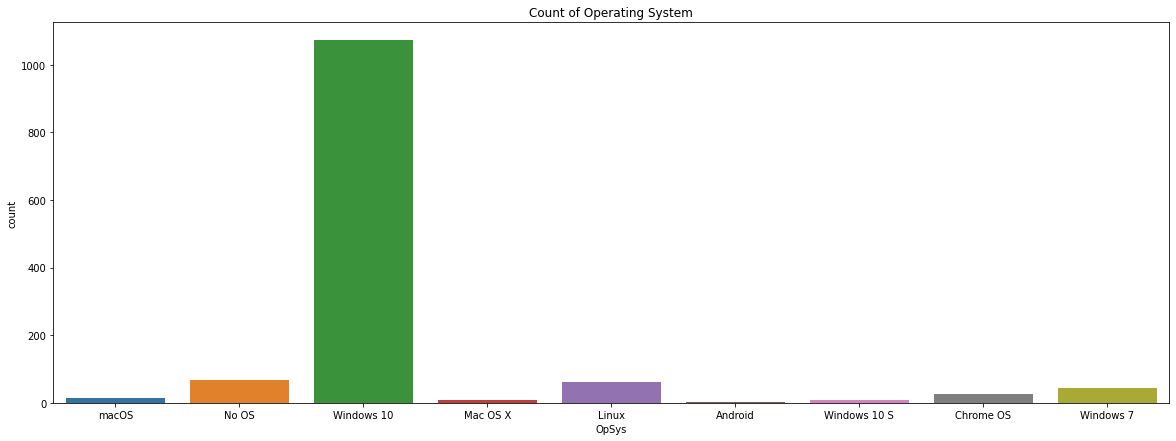

In [457]:
plt.figure(figsize=(20,7))
sns.countplot(x=df['OpSys'])
plt.title("Count of Operating System")
plt.show()

<AxesSubplot:xlabel='Weight'>

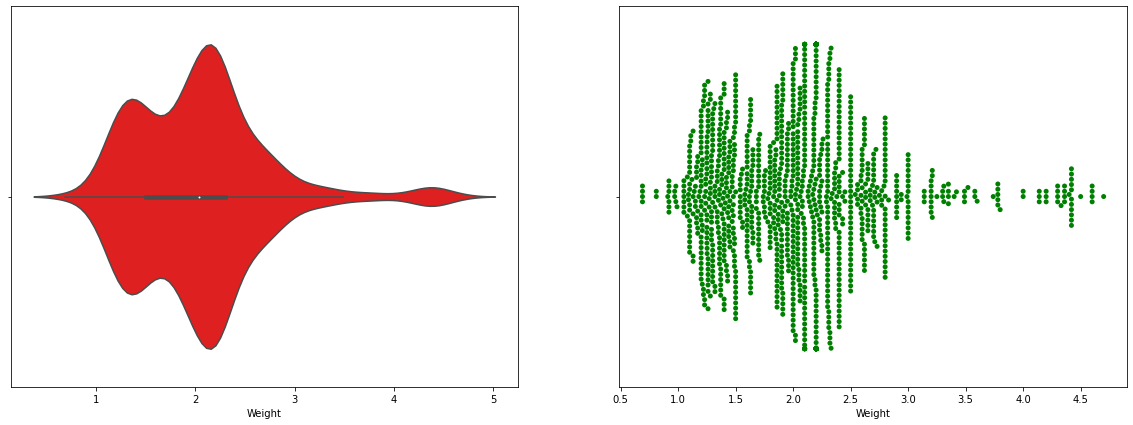

In [458]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,7))
sns.violinplot(df['Weight'],ax=ax1,color="red")
sns.swarmplot(df['Weight'],ax=ax2,color="green")

### Insights:
    The above chart shows that most of the data contains weight between 1 to 3 kgs.

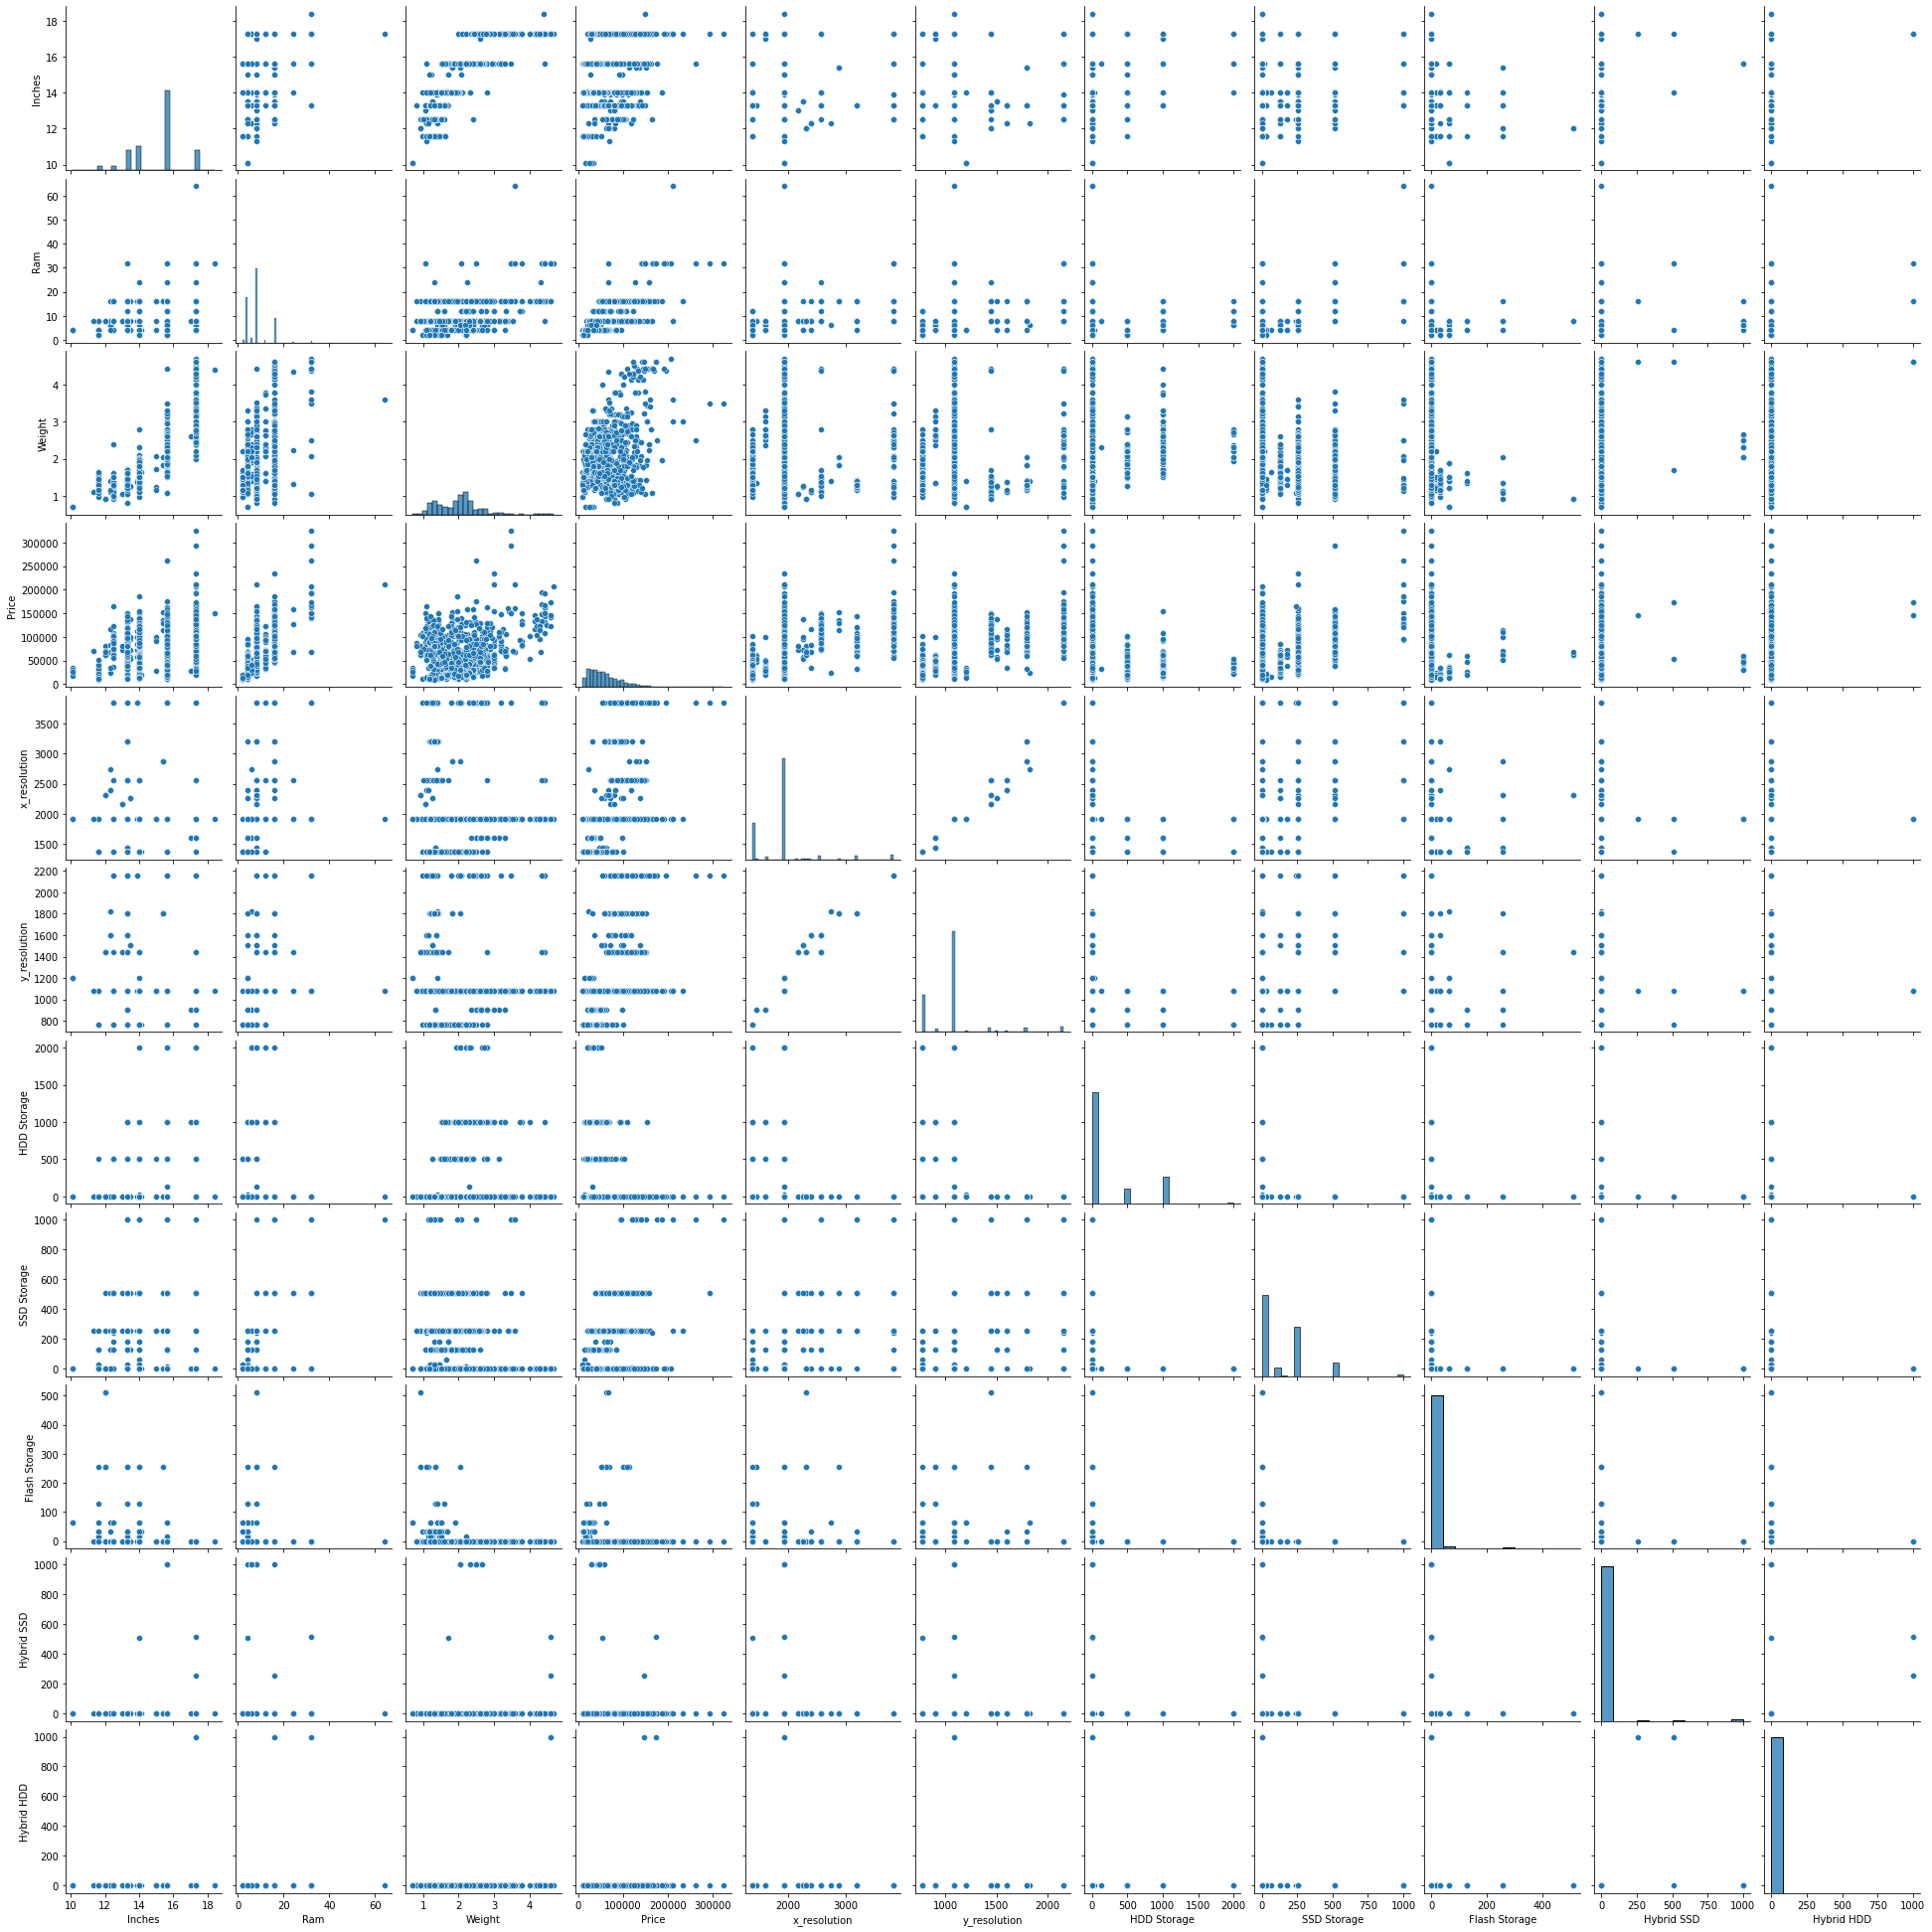

In [459]:
sns.pairplot(df)

<AxesSubplot:>

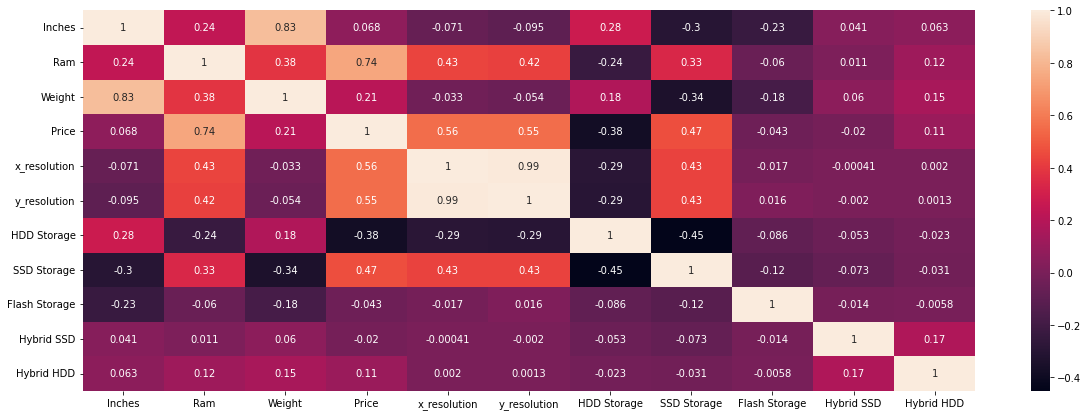

In [460]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)

In [461]:
df.corr()['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
x_resolution     0.556529
y_resolution     0.552809
HDD Storage     -0.379544
SSD Storage      0.465567
Flash Storage   -0.042593
Hybrid SSD      -0.020186
Hybrid HDD       0.105004
Name: Price, dtype: float64

As we can see Ram is one which is highly correlated with price but for the prediction of laptop price all the features are important to affect the price.

## Encoding

In [462]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [463]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,x_resolution,y_resolution,HDD Storage,SSD Storage,Flash Storage,Hybrid SSD,Hybrid HDD
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,0,128,0,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,0,0,128,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,0,256,0,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,0,512,0,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,0,256,0,0,0


In [464]:
cat_cols=df.select_dtypes("O").columns
cat_cols

Index(['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys'], dtype='object')

In [465]:
cpu_values=np.sort(df['Cpu'].unique())
count=0
for i in cpu_values:
    print(count,"=",i)
    count+=1

0 = AMD A10-Series 9600P 2.4GHz
1 = AMD A10-Series 9620P 2.5GHz
2 = AMD A10-Series A10-9620P 2.5GHz
3 = AMD A12-Series 9700P 2.5GHz
4 = AMD A12-Series 9720P 2.7GHz
5 = AMD A12-Series 9720P 3.6GHz
6 = AMD A4-Series 7210 2.2GHz
7 = AMD A6-Series 7310 2GHz
8 = AMD A6-Series 9220 2.5GHz
9 = AMD A6-Series 9220 2.9GHz
10 = AMD A6-Series A6-9220 2.5GHz
11 = AMD A8-Series 7410 2.2GHz
12 = AMD A9-Series 9410 2.9GHz
13 = AMD A9-Series 9420 2.9GHz
14 = AMD A9-Series 9420 3GHz
15 = AMD A9-Series A9-9420 3GHz
16 = AMD E-Series 6110 1.5GHz
17 = AMD E-Series 7110 1.8GHz
18 = AMD E-Series 9000 2.2GHz
19 = AMD E-Series 9000e 1.5GHz
20 = AMD E-Series E2-6110 1.5GHz
21 = AMD E-Series E2-9000 2.2GHz
22 = AMD E-Series E2-9000e 1.5GHz
23 = AMD FX 8800P 2.1GHz
24 = AMD FX 9830P 3GHz
25 = AMD Ryzen 1600 3.2GHz
26 = AMD Ryzen 1700 3GHz
27 = Intel Atom X5-Z8350 1.44GHz
28 = Intel Atom Z8350 1.92GHz
29 = Intel Atom x5-Z8300 1.44GHz
30 = Intel Atom x5-Z8350 1.44GHz
31 = Intel Atom x5-Z8550 1.44GHz
32 = Intel Cele

In [466]:
# encoding cpu
df['Cpu']=le.fit_transform(df['Cpu'])

In [467]:
gpu_values=np.sort(df['Gpu'].unique())
count=0
for i in gpu_values:
    print(count,"=",i)
    count+=1

0 = AMD FirePro W4190M
1 = AMD FirePro W4190M 
2 = AMD FirePro W5130M
3 = AMD FirePro W6150M
4 = AMD R17M-M1-70
5 = AMD R4 Graphics
6 = AMD Radeon 520
7 = AMD Radeon 530
8 = AMD Radeon 540
9 = AMD Radeon Pro 455
10 = AMD Radeon Pro 555
11 = AMD Radeon Pro 560
12 = AMD Radeon R2
13 = AMD Radeon R2 Graphics
14 = AMD Radeon R3
15 = AMD Radeon R4
16 = AMD Radeon R4 Graphics
17 = AMD Radeon R5
18 = AMD Radeon R5 430
19 = AMD Radeon R5 520
20 = AMD Radeon R5 M315
21 = AMD Radeon R5 M330
22 = AMD Radeon R5 M420
23 = AMD Radeon R5 M420X
24 = AMD Radeon R5 M430
25 = AMD Radeon R7
26 = AMD Radeon R7 Graphics
27 = AMD Radeon R7 M360
28 = AMD Radeon R7 M365X
29 = AMD Radeon R7 M440
30 = AMD Radeon R7 M445
31 = AMD Radeon R7 M460
32 = AMD Radeon R7 M465
33 = AMD Radeon R9 M385
34 = AMD Radeon RX 540
35 = AMD Radeon RX 550
36 = AMD Radeon RX 560
37 = AMD Radeon RX 580
38 = ARM Mali T860 MP4
39 = Intel Graphics 620
40 = Intel HD Graphics
41 = Intel HD Graphics 400
42 = Intel HD Graphics 405
43 = Inte

In [468]:
# encoding gpu
df['Gpu']=le.fit_transform(df['Gpu'])

In [469]:
OpSys_values=np.sort(df['OpSys'].unique())
count=0
for i in OpSys_values:
    print(count,"=",i)
    count+=1

0 = Android
1 = Chrome OS
2 = Linux
3 = Mac OS X
4 = No OS
5 = Windows 10
6 = Windows 10 S
7 = Windows 7
8 = macOS


In [470]:
# encoding gpu
df['OpSys']=le.fit_transform(df['OpSys'])

In [471]:
Company_values=np.sort(df['Company'].unique())
count=0
for i in Company_values:
    print(count,"=",i)
    count+=1

0 = Acer
1 = Apple
2 = Asus
3 = Chuwi
4 = Dell
5 = Fujitsu
6 = Google
7 = HP
8 = Huawei
9 = LG
10 = Lenovo
11 = MSI
12 = Mediacom
13 = Microsoft
14 = Razer
15 = Samsung
16 = Toshiba
17 = Vero
18 = Xiaomi


In [472]:
# encoding gpu
df['Company']=le.fit_transform(df['Company'])

In [473]:
TypeName_values=np.sort(df['TypeName'].unique())
count=0
for i in TypeName_values:
    print(count,"=",i)
    count+=1

0 = 2 in 1 Convertible
1 = Gaming
2 = Netbook
3 = Notebook
4 = Ultrabook
5 = Workstation


In [474]:
# encoding gpu
df['TypeName']=le.fit_transform(df['TypeName'])

In [475]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,x_resolution,y_resolution,HDD Storage,SSD Storage,Flash Storage,Hybrid SSD,Hybrid HDD
0,1,4,13.3,65,8,58,8,1.37,71378.6832,2560,1600,0,128,0,0,0
1,1,4,13.3,63,8,51,8,1.34,47895.5232,1440,900,0,0,128,0,0
2,7,3,15.6,74,8,53,4,1.86,30636.0000,1920,1080,0,256,0,0,0
3,1,4,15.4,85,16,9,8,1.83,135195.3360,2880,1800,0,512,0,0,0
4,1,4,13.3,67,8,59,8,1.37,96095.8080,2560,1600,0,256,0,0,0


In [476]:
# Featuring
X=df.drop("Price",axis=1)
y=df['Price']

In [477]:
X.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,x_resolution,y_resolution,HDD Storage,SSD Storage,Flash Storage,Hybrid SSD,Hybrid HDD
0,1,4,13.3,65,8,58,8,1.37,2560,1600,0,128,0,0,0
1,1,4,13.3,63,8,51,8,1.34,1440,900,0,0,128,0,0
2,7,3,15.6,74,8,53,4,1.86,1920,1080,0,256,0,0,0
3,1,4,15.4,85,16,9,8,1.83,2880,1800,0,512,0,0,0
4,1,4,13.3,67,8,59,8,1.37,2560,1600,0,256,0,0,0


In [478]:
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

## Train Test Split

In [479]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [480]:
X_train.shape

(1042, 15)

In [481]:
X_test.shape

(261, 15)

In [482]:
y_train.shape

(1042,)

In [483]:
y_test.shape

(261,)

## Modeling

In [486]:
# linear regression

In [487]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()

In [488]:
mlr.fit(X_train,y_train)

LinearRegression()

In [489]:
y_train_pred=mlr.predict(X_train)
y_test_pred=mlr.predict(X_test)

In [490]:
from sklearn.metrics import r2_score,mean_squared_error

In [491]:
def model_performance(y_actual,y_pred):
    print("r2_score: ",r2_score(y_actual,y_pred),"|","RMSE: ",np.sqrt(mean_squared_error(y_actual,y_pred)) )

In [492]:
print("Train Performance")
print(model_performance(y_train,y_train_pred))
print("Test Performance")
print(model_performance(y_test,y_test_pred))

Train Performance
r2_score:  0.7220666598214603 | RMSE:  20023.562557628706
None
Test Performance
r2_score:  0.7243101088744984 | RMSE:  17847.528003266318
None


## Ridge

In [493]:
from sklearn.linear_model import Ridge
r1=Ridge()
r1.fit(X_train,y_train)

Ridge()

In [494]:
y_train_pred_r1=r1.predict(X_train)
y_test_pred_r1=r1.predict(X_test)

In [495]:
print("Train Performance")
print(model_performance(y_train,y_train_pred_r1))
print("Test Performance")
print(model_performance(y_test,y_test_pred_r1))

Train Performance
r2_score:  0.7220651948727268 | RMSE:  20023.615328292955
None
Test Performance
r2_score:  0.7244128346403391 | RMSE:  17844.202578829616
None


## Lasso

In [496]:
from sklearn.linear_model import Lasso
l1=Lasso()
l1.fit(X_train,y_train)

Lasso()

In [497]:
y_train_pred_l1=l1.predict(X_train)
y_test_pred_l1=l1.predict(X_test)

In [498]:
print("Train Performance")
print(model_performance(y_train,y_train_pred_l1))
print("Test Performance")
print(model_performance(y_test,y_test_pred_l1))

Train Performance
r2_score:  0.7220666438879164 | RMSE:  20023.563131590632
None
Test Performance
r2_score:  0.724319990277529 | RMSE:  17847.20815077392
None
